In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
!pip install keras-unet

In [4]:
import keras
from keras_unet.models import custom_unet

2023-04-05 22:55:53.096015: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/kunal.jain001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [5]:
DATAPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/npy_files'
images_file = os.path.join(DATAPATH, 'fly-mar-06-original-images.npy')

In [6]:
images = np.load(images_file)

In [7]:
images.shape

(56, 512, 512)

In [8]:
SRCPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/good_images/'

In [9]:
img_file_names = os.listdir(SRCPATH)

In [10]:
import mahotas as mh

In [34]:
test_slices = []


for img in img_file_names:
    if (img.endswith("tif")):
        a = mh.imread(os.path.join(SRCPATH, img))
        a = a.astype(np.float)
        a /= a.max()
        a *= 255
        a_cropped = a[1500:2012, 2968:3480].astype(np.float)

        test_slices.append(a_cropped)

/tmp/ipykernel_936435/3445029487.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = a.astype(np.float)
/tmp/ipykernel_936435/3445029487.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a_cropped = a[1500:2012, 2968:3480].astype(np.float)


In [35]:
test_slices = np.array(test_slices).astype(np.float64)

In [36]:
test_slices.shape

(253, 512, 512)

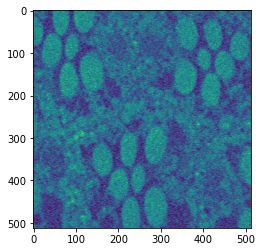

In [37]:
imshow(test_slices[100])

In [38]:
test_slices_expand_dims = np.expand_dims(test_slices, axis=3)

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import keras.optimizers
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance

In [40]:
MODELPATH = 'raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/models/'

In [58]:
OLDMODELPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/npy_files/'

In [67]:
loaded_model = keras.models.load_model(os.path.join(OLDMODELPATH, '03-08.hdf5'), custom_objects={"iou": iou, "iou_thresholded": iou_thresholded})

In [42]:
random_indices = np.random.choice(253, 10)

In [43]:
random_indices

array([ 69, 172, 170,   9,  26, 129, 221,  48, 204, 204])

In [45]:
ten_random_slices = np.empty([10, 512, 512, 1])
z = 0

for i in random_indices:
    ten_random_slices[z] = test_slices_expand_dims[i]
    z = z + 1

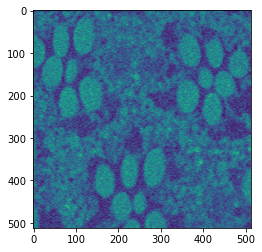

In [46]:
imshow(ten_random_slices[0])

In [47]:
ten_random_slices.shape

(10, 512, 512, 1)

In [ ]:
import time

start = time.time()

y_predict = loaded_model.predict(ten_random_slices)

end = time.time()

print(end-start)

In [61]:
y_predict.shape

(10, 512, 512, 1)

In [62]:
y_predict = np.array(y_predict).astype(np.float64)

In [63]:
y_predict.shape

(10, 512, 512, 1)

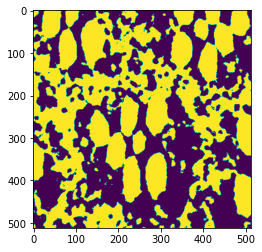

In [66]:
imshow(y_predict[5])

In [23]:
model.compile(optimizer = 'Adam',    
              loss='binary_crossentropy', 
              metrics=[iou, iou_thresholded])

In [24]:
history = model.fit(X_train, 
                    y_train, 
                    32, 
                    epochs=100,
                    validation_data=(X_val, y_val), 
                    verbose=1)

model.save(os.path.join(MODELPATH, '04-05.hdf5'))

2023-04-05 18:43:46.994071: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-05 18:43:47.013186: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/100


2023-04-05 18:43:48.257610: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-05 18:43:49.092191: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-05 18:43:50.166824: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-05 18:43:50.166851: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-05 18:43:50.167254: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-05 18:43:50.246874: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-05 18:43:51.404709: I tensorflow/stream_exec

141/141 [==============================] - 72s 426ms/step - loss: 0.3477 - iou: 0.1249 - iou_thresholded: 0.0845 - val_loss: 0.1568 - val_iou: 0.3160 - val_iou_thresholded: 0.3585
Epoch 2/100
141/141 [==============================] - 50s 352ms/step - loss: 0.1302 - iou: 0.4769 - iou_thresholded: 0.6014 - val_loss: 0.1389 - val_iou: 0.3629 - val_iou_thresholded: 0.3021
Epoch 3/100
141/141 [==============================] - 50s 355ms/step - loss: 0.0905 - iou: 0.6012 - iou_thresholded: 0.7062 - val_loss: 0.0829 - val_iou: 0.5635 - val_iou_thresholded: 0.7176
Epoch 4/100
141/141 [==============================] - 50s 356ms/step - loss: 0.0780 - iou: 0.6465 - iou_thresholded: 0.7388 - val_loss: 0.0779 - val_iou: 0.6155 - val_iou_thresholded: 0.6902
Epoch 5/100
141/141 [==============================] - 50s 356ms/step - loss: 0.0715 - iou: 0.6702 - iou_thresholded: 0.7574 - val_loss: 0.0944 - val_iou: 0.5576 - val_iou_thresholded: 0.6180
Epoch 6/100
141/141 [==============================]

141/141 [==============================] - 50s 357ms/step - loss: 0.0182 - iou: 0.9067 - iou_thresholded: 0.9351 - val_loss: 0.0474 - val_iou: 0.8367 - val_iou_thresholded: 0.8661
Epoch 86/100
141/141 [==============================] - 50s 357ms/step - loss: 0.0169 - iou: 0.9120 - iou_thresholded: 0.9384 - val_loss: 0.0574 - val_iou: 0.8284 - val_iou_thresholded: 0.8584
Epoch 87/100
141/141 [==============================] - 50s 357ms/step - loss: 0.0172 - iou: 0.9109 - iou_thresholded: 0.9377 - val_loss: 0.0583 - val_iou: 0.8435 - val_iou_thresholded: 0.8649
Epoch 88/100
141/141 [==============================] - 50s 357ms/step - loss: 0.0170 - iou: 0.9119 - iou_thresholded: 0.9383 - val_loss: 0.0523 - val_iou: 0.8418 - val_iou_thresholded: 0.8647
Epoch 89/100
141/141 [==============================] - 50s 357ms/step - loss: 0.0167 - iou: 0.9131 - iou_thresholded: 0.9392 - val_loss: 0.0517 - val_iou: 0.8282 - val_iou_thresholded: 0.8570
Epoch 90/100
141/141 [==========================

In [26]:
MODELPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/models/'

In [27]:
model.save(os.path.join(MODELPATH, '04-05.hdf5'))

In [28]:
y_pred = model.predict(X_test)

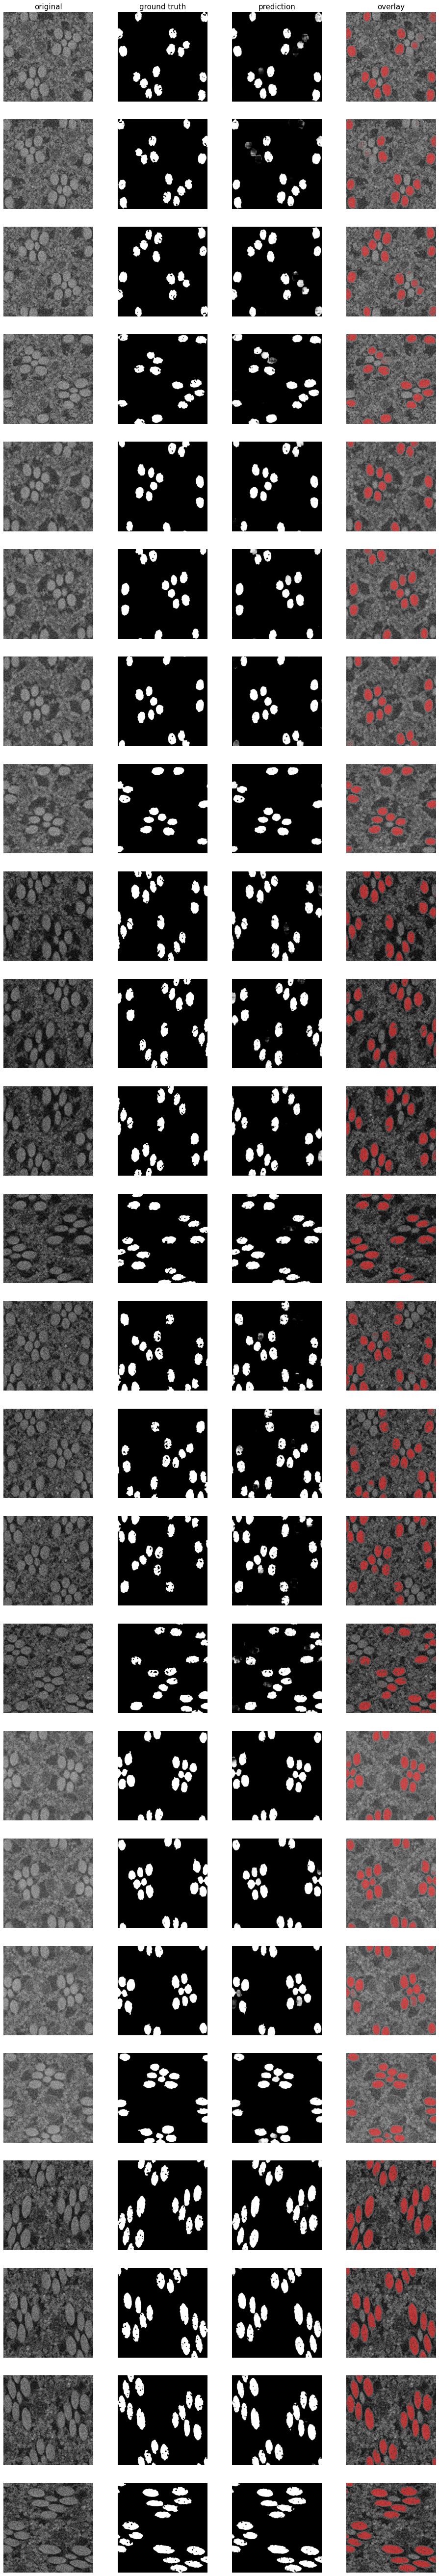

In [29]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=24)

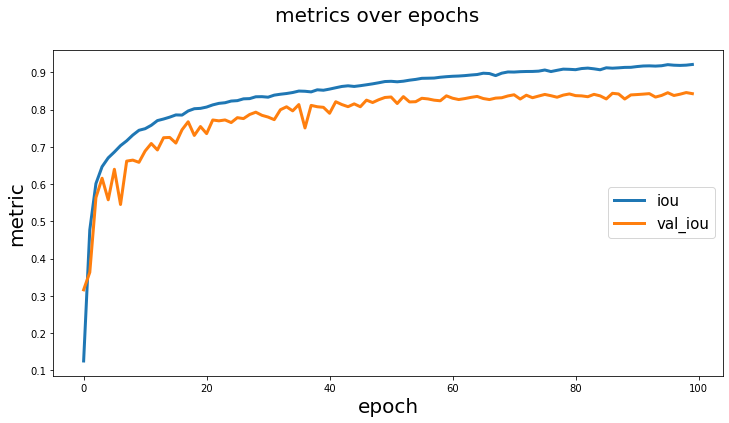

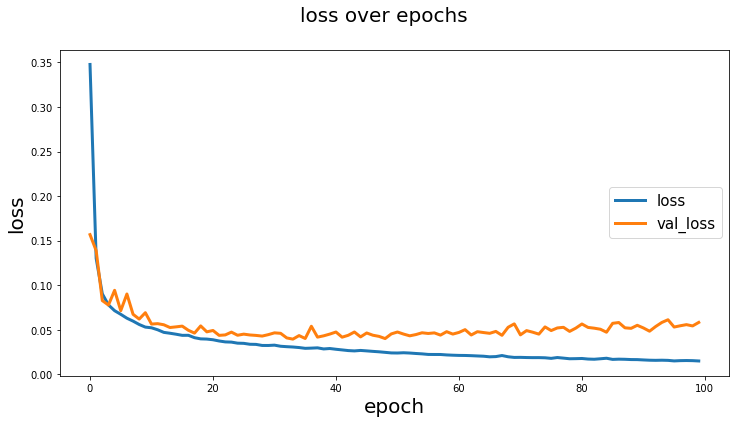

In [30]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)